# Linear Regression

Simple Regression (PTS ~ G)
Intercept: 3.7372431596039206
Coefficient for Goals: 2.1767804545225644
R^2: 0.8461669386312143


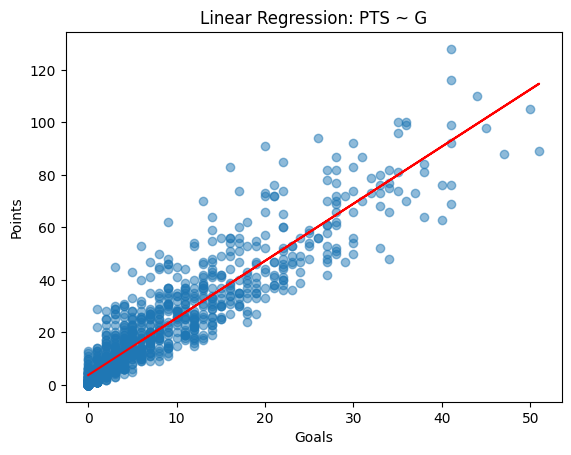


Multiple Regression (PTS ~ G + A)
Intercept: 7.105427357601002e-15
Coefficients (Goals, Assists): [1. 1.]
R^2: 1.0


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load hockey dataset
df = pd.read_csv("https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv")

# --- Simple Regression: PTS ~ G ---
X1 = df[['G']].values
y = df['PTS'].values
lin1 = LinearRegression().fit(X1, y)

print("Simple Regression (PTS ~ G)")
print("Intercept:", lin1.intercept_)
print("Coefficient for Goals:", lin1.coef_[0])
print("R^2:", lin1.score(X1, y))

# Plot
plt.scatter(df['G'], y, alpha=0.5)
plt.plot(df['G'], lin1.predict(X1), color='red')
plt.xlabel("Goals")
plt.ylabel("Points")
plt.title("Linear Regression: PTS ~ G")
plt.show()

# --- Multiple Regression: PTS ~ G + A ---
X2 = df[['G', 'A']].values
lin2 = LinearRegression().fit(X2, y)

print("\nMultiple Regression (PTS ~ G + A)")
print("Intercept:", lin2.intercept_)
print("Coefficients (Goals, Assists):", lin2.coef_)
print("R^2:", lin2.score(X2, y))


# Logistic Regression

In [15]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load the dataset
url = 'https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/Avengers'
df = pd.read_csv(url)

# Data preprocessing
# Convert Death1 to binary (YES=1, NO=0)
df['Death1_num'] = df['Death1'].map({'YES': 1, 'NO': 0})

# Create dummy variable for Gender (Female=1, Male=0)
df['Female'] = df['Gender'].map({'FEMALE': 1, 'MALE': 0})

# Select predictors and target
X = df[['Appearances', 'Female']].dropna()  # Drop rows with missing values
y = df.loc[X.index, 'Death1_num'].dropna()

# Ensure X and y have matching indices
X = X.loc[y.index]

# Add constant for intercept
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X).fit()

# Print model summary
print(model.summary())

# Predict probability for Tony Stark (Appearances=3068, Male)
tony_stark = pd.DataFrame({
    'const': [1],  # Constant term
    'Appearances': [3068],
    'Female': [0]
})

# Calculate predicted probability
prob = model.predict(tony_stark)
print(f"\nPredicted probability of Tony Stark dying (Death1 = YES): {prob[0]:.4f}")

Optimization terminated successfully.
         Current function value: 0.649623
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             Death1_num   No. Observations:                  173
Model:                          Logit   Df Residuals:                      170
Method:                           MLE   Df Model:                            2
Date:                Wed, 01 Oct 2025   Pseudo R-squ.:                 0.03408
Time:                        05:13:49   Log-Likelihood:                -112.38
converged:                       True   LL-Null:                       -116.35
Covariance Type:            nonrobust   LLR p-value:                   0.01897
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6595      0.229     -2.879      0.004      -1.108      -0.211
Appearances     0.0007    

# **Custom Regration**

Regression Coefficient: -0.010364506852667653
Intercept: 30.46720582476751
R^2: 0.9338739506778208


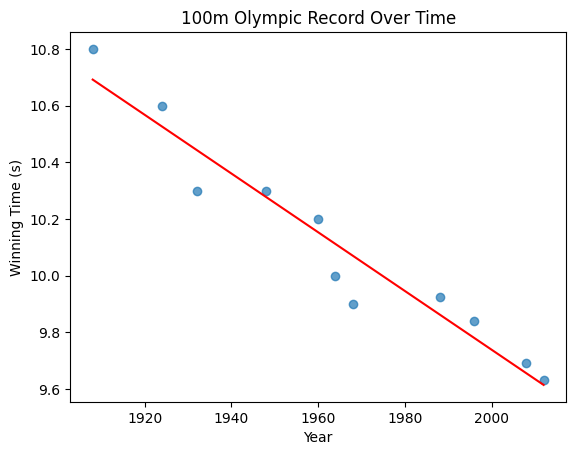


Predicted Winning Time 2024: 9.48944395496818
Predicted Winning Time 2300: 6.628840063631909


In [14]:
# Load Olympic data
df = pd.read_csv("https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv")

# Use only Men's finals to simplify
men = df[(df['Gender']=="Men") & (df['Round']=="Final")]

X = men['Games'].values.reshape(-1,1)  # Year of games
y = men['Time'].values

lin = LinearRegression().fit(X,y)

print("Regression Coefficient:", lin.coef_[0])
print("Intercept:", lin.intercept_)
print("R^2:", lin.score(X,y))

# Plot
plt.scatter(X,y, alpha=0.7)
plt.plot(X, lin.predict(X), color='red')
plt.xlabel("Year")
plt.ylabel("Winning Time (s)")
plt.title("100m Olympic Record Over Time")
plt.show()

# Predictions
print("\nPredicted Winning Time 2024:", lin.predict([[2024]])[0])
print("Predicted Winning Time 2300:", lin.predict([[2300]])[0])
